<a href="https://colab.research.google.com/github/aniruddhha/100-days-of-ml/blob/main/05_day_insurance_prediction_linear_regression_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the data from git
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# Check the data
# numerical columns
insurance['age'], insurance['bmi'], insurance['children'], insurance['charges']

# non numerical columns
insurance['sex'], insurance['smoker'], insurance['region']

(0       female
 1         male
 2         male
 3         male
 4         male
          ...  
 1333      male
 1334    female
 1335    female
 1336    female
 1337    female
 Name: sex, Length: 1338, dtype: object, 0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object, 0       southwest
 1       southeast
 2       southeast
 3       northwest
 4       northwest
           ...    
 1333    northwest
 1334    northeast
 1335    southeast
 1336    southwest
 1337    northwest
 Name: region, Length: 1338, dtype: object)

In [4]:
# need to remove non numercial (categorical) columns to numbers, i.e. called numerical encoding
# one hot encoding
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.tail()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1333,50,30.97,3,10600.5483,0,1,1,0,0,1,0,0
1334,18,31.92,0,2205.9808,1,0,1,0,1,0,0,0
1335,18,36.85,0,1629.8335,1,0,1,0,0,0,1,0
1336,21,25.80,0,2007.9450,1,0,1,0,0,0,0,1
1337,61,29.07,0,29141.3603,1,0,0,1,0,1,0,0


In [5]:
# Creating X and Y values
X = insurance_one_hot.drop('charges', axis = 1)
y = insurance_one_hot['charges']

In [6]:
# Check X
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [7]:
# Check Y
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [8]:
# Split the training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
# Check the split for X
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [10]:
# Check the split for Y
len(y), len(y_train), len(y_test)

(1338, 1070, 268)

In [11]:
# Build the neural network
tf.random.set_seed(42)

insurance_model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

insurance_model1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

insurance_model1.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13342.7617 - mae: 13342.7617
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13340.9502 - mae: 13340.9502
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13338.9932 - mae: 13338.9932
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13336.8438 - mae: 13336.8438
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13334.4639 - mae: 13334.4639
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 13331.8008 - mae: 13331.8008
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 13328.8477 - mae: 13328.8477
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 13325.5811 - mae: 13325.5811
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 13321.9756 - mae: 13321.9756
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 13318.02

In [12]:
# lets evaluate the model
insurance_model1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 11807.0781 - mae: 11807.0781


[11807.078125, 11807.078125]

In [48]:
# try to make your analysis 
y_train.median(), y_train.mean()

# result shows our model is significantly wrong, lets improve it

(9575.4421, 13346.089736364485)

In [14]:
tf.random.set_seed(42)

insurance_model2 = tf.keras.Sequential([ 
    tf.keras.layers.Dense(10), 
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1), 
])

insurance_model2.compile( 
    loss = tf.keras.losses.mae, 
    optimizer = tf.keras.optimizers.Adam(), 
    metrics = ['mae'] 
)

insurance_model2.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 200, verbose = 0)

In [15]:
insurance_model2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8628.6992 - mae: 8628.6992


[8628.69921875, 8628.69921875]

In [16]:
tf.random.set_seed(42)

insurance_model3 = tf.keras.Sequential([ 
    tf.keras.layers.Dense(100), 
    tf.keras.layers.Dense(100), 
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1), 
])

insurance_model3.compile( 
    loss = tf.keras.losses.mae, 
    optimizer = tf.keras.optimizers.Adam(), 
    metrics = ['mae'] 
)

history = insurance_model3.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 300, verbose = 0)

In [17]:
insurance_model3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8633.2695 - mae: 8633.2695


[8633.26953125, 8633.26953125]

Text(0.5, 0, 'epochs')

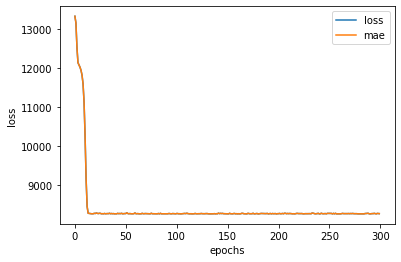

In [18]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [19]:
# predicting by means of perticular feature. But seems I didnt understand it.
pd_dataset = pd.DataFrame({
    "safdlkjsdkf": [10],
})

insurance_model3.predict(pd_dataset)

1/1 [==============================] - 0s 175ms/step


array([[[9619.113]]], dtype=float32)

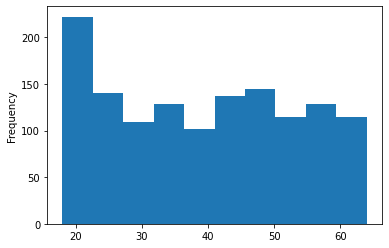

In [22]:
# Normalization and Distribution
X['age'].plot(kind = 'hist')

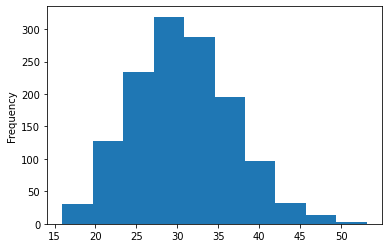

In [23]:
X['bmi'].plot(kind = 'hist')

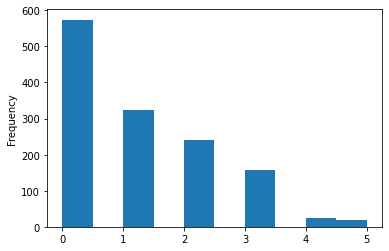

In [24]:
X['children'].plot(kind = 'hist')

In [32]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi','children']),
    (OneHotEncoder(handle_unknown = 'ignore'), ['sex', 'smoker', 'region'])
)

X = insurance.drop('charges', axis = 1)
y = insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [35]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [45]:
# create neural network

tf.random.set_seed(42)

insurance_model4 = tf.keras.Sequential([ 
    tf.keras.layers.Dense(100), 
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1), 
])

insurance_model4.compile( 
    loss = tf.keras.losses.mae, 
    optimizer = tf.keras.optimizers.Adam(), 
    metrics = ['mae'] 
)

history = insurance_model4.fit(tf.expand_dims(X_train_normal, axis = -1), y_train, epochs = 100, verbose = 0)

In [46]:
insurance_model4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8622.1045 - mae: 8622.1045


[8622.1044921875, 8622.1044921875]

Text(0.5, 0, 'epochs')

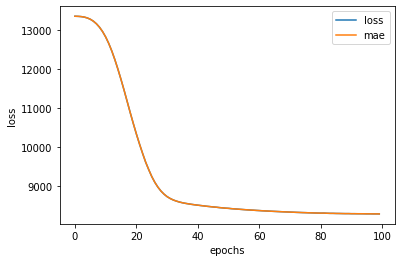

In [47]:
pd.DataFrame(history.history).plot()     

plt.ylabel('loss')
plt.xlabel('epochs')